<a href="https://colab.research.google.com/github/IA-DAMA/MIT-DeepLearning/blob/main/Navigating_Bias%2C_Uncertainty%2C_and_Robustness_in_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Copyright Information*

- *Reference: © MIT Introduction to Deep Learning: http://introtodeeplearning.com*


- <font color="pale red">*Changes, inferences, side comments and aprroaches were carried out by Damadori on: https://github.com/IA-DAMA/MIT-DeepLearning*  </font>

# *Developed and modified by IA-DAMA*

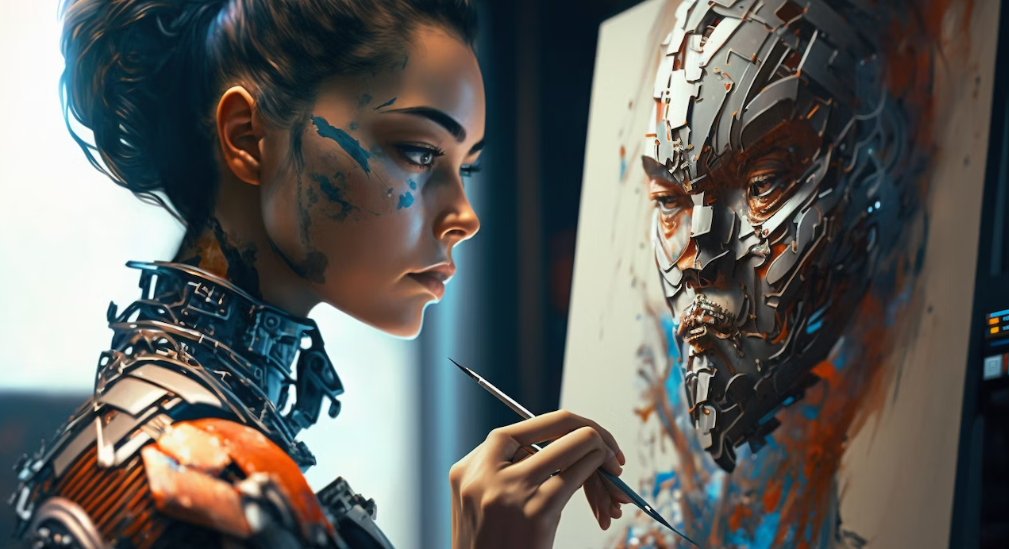

# *Debiasing, Uncertainty, and Robustness*

# *Part 1: Introduction to Enhancing Models*

- <font color="gold">*Introduction to enhancing models, including topics like bias, uncertainty, and data noise.*</font>

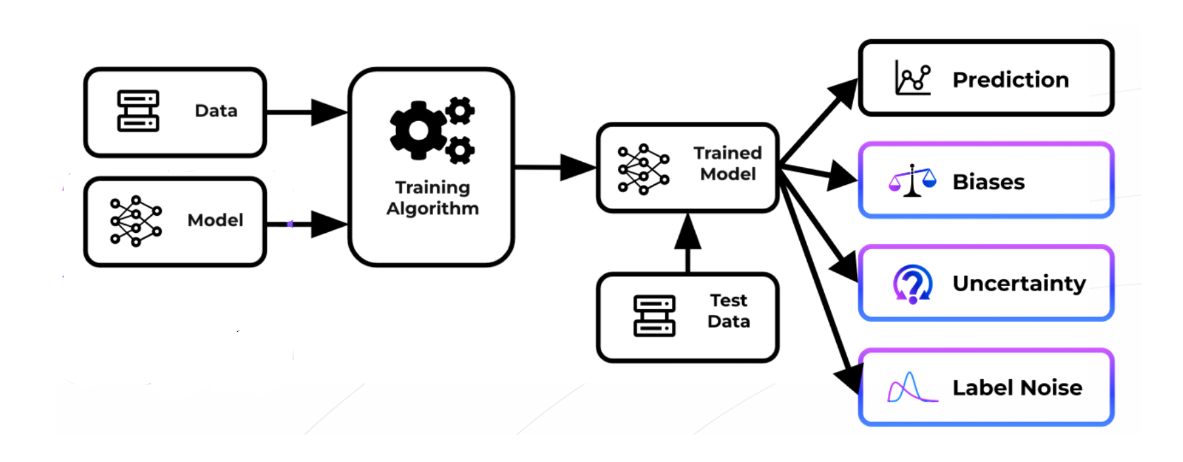

*In this lab, we will delve into various techniques to bolster the robustness and reliability of deep learning models. This pursuit is crucial for building models that can be trusted in critical applications.*

*To achieve this goal, it's pivotal to be able to identify and address bias and uncertainty issues within deep learning models. These topics were previously explored in <font color="red">Facial Detection Lab 2</font>. In our journey, we require standardized benchmarks that provide a uniform measure of how uncertain a particular model's predictions are. Additionally, we need principled methods to quantify both bias and uncertainty. To this end, we will harness different libraries since Capsa, the risk-estimation wrapping library developed by Themis AI, is not available in this context. These libraries allow us to address the following aspects:*

- <font color="gold">*TensorFlow Probability (TFP):*</font> *Dealing with uncertainty and aleatoric uncertainty in deep learning models.*

- <font color="gold">*AI Fairness 360 (AIF360):*</font> *Evaluating and mitigating bias in machine learning models.*

- <font color="gold">*Adversarial Robustness Toolbox (ART):*</font> *Evaluating and enhancing adversarial - robustness of models.*

- <font color="gold">*CleverHans:*</font> *Evaluating and enhancing adversarial robustness of models.*

- <font color="gold">*LIME (Local Interpretable Model-Agnostic Explanations):*</font> *Model interpretability.*

- <font color="gold">*Scikit-learn:*</font> *A widely-used machine learning library that includes tools for model evaluation, data preprocessing, and more.*

*To quantify the level of uncertainty inherent in a given model, we will employ <font color="gold">TFP (TensorFlow Probability)</font>, a risk-estimation library available within the TensorFlow community on GitHub. TFP provides support for estimating three distinct categories of risks, namely::*

- <font color="red">*Representation Bias:*</font> *This dimension gauges the likelihood of specific combinations of features appearing within a provided dataset.*

- <font color="red">*Data uncertainty:*</font> *This facet encapsulates the presence of noise in the data, a concept closely related to aleatoric uncertainty.*

- <font color="red">*Model uncertainty:*</font> *Within this dimension, we capture the regions of our underlying data distribution that the model has yet to learn or finds challenging to comprehend. In our context, we will focus on addressing epistemic uncertainty.*

<font color="gold">*By leveraging TFP, we can methodically measure both bias and uncertainty, enabling a comprehensive understanding of the model's limitations and areas of improvement. Through this process, we aim to enhance the model's robustness and reliability, making it a more trustworthy asset for diverse applications.*</font>



# *1.1 Installing the necessary dependencies*

- *As "Capsa" ain't running on Colab, I'll be integrating some well-known and broadly confident dependencies.*

In [1]:
# Import Tensorflow 2.0
%tensorflow_version 2.x
import tensorflow as tf

import IPython
import functools
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

# Download and import the MIT Introduction to Deep Learning package
!pip install mitdeeplearning
import mitdeeplearning as mdl


# Install TensorFlow Probability (TFP) for modeling uncertainty (Aleatoric and Epistemic)
!pip install tensorflow-probability
import tensorflow_probability as tfp

# Install AI Fairness 360 (AIF360) for addressing bias and fairness
!pip install aif360
import aif360

# Install CleverHans for evaluating and improving adversarial robustness
!pip install cleverhans
import cleverhans

# Install Adversarial Robustness Toolbox (ART): Evaluating and enhancing adversarial robustness of models.
!pip install adversarial-robustness-toolbox
from art import *

# Install LIME (Local Interpretable Model-Agnostic Explanations): Model interpretability.
!pip install lime
import lime

# Install Scikit-learn: A widely-used machine learning library that includes tools for model evaluation, data preprocessing, and more.
!pip install scikit-learn
import sklearn

# Download and import Capsa -  It doesn't work :( If you know how to install, teach me :)
#!pip install Capsa
#import capsa

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 14.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for mitdeeplearning: filename=mitdeeplearning-0.3.0-py3-none-any.whl size=2117302 sha256=bafa8194f019c48bdc428ce83e1479f226d5b9220284f25def079241e2982450
  Stored in directory: /root/.cache/pip/wheels/9c/9f/b5/0e31f83bc60a83625e37429f923934e26802d0d68cf3ef3216
Successfully built mitdeeplearning


/usr/local/lib/python3.10/dist-packages/tensorflow_probability/python/__init__.py:57: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if (distutils.version.LooseVersion(tf.__version__) <


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.1/214.1 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.3/92.3 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 24.3 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=26c505933b21a57e59cfe56df1c01975c0e0caffa6efbf425b45b98b4dcdca4f
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


# *Part 2: Dataset and Initial Analysis*

- <font color="gold">*Initial dataset analysis, including recognizing bias, uncertainty, and data noise*.</font>

# *2.1 Dataset*

*We will gain insights into the concepts of bias and uncertainty through the process of training a neural network for a straightforward 2D regression task, focused on modeling the function . Throughout this process, we will thoroughly examine the dataset and carefully evaluate the model's performance. Moreover, we will introduce variations into the dataset, such as incorporating noise and intentionally introducing instances of missing data.*

- *Let's generate the dataset and visualize it:*

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


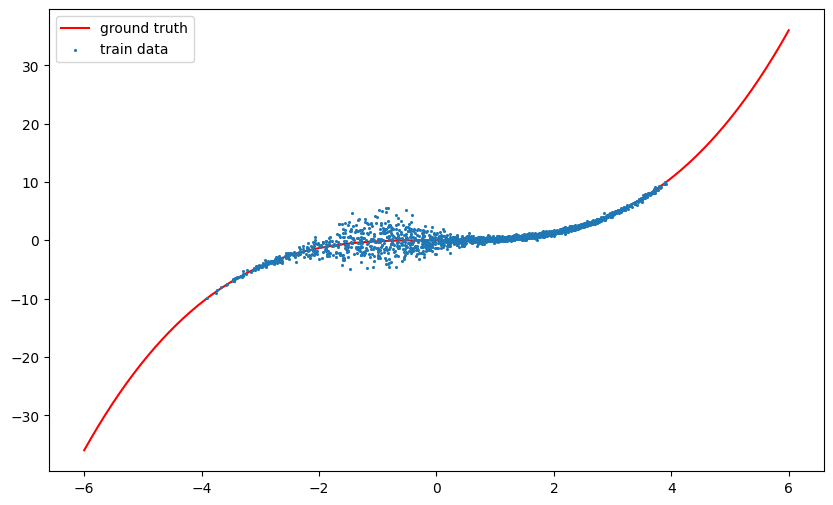

In [2]:
# Generating Data for the Cubic Function with Noise and Missing-ness
# This section creates a synthetic dataset to be used as a test case for our analysis.
def gen_data(x_min, x_max, n, train=True):

  # Generate training data with triangular distribution, testing data with linear distribution
  if train:
    x = np.random.triangular(x_min, 2, x_max, size=(n, 1))
  else:
    x = np.linspace(x_min, x_max, n).reshape(n, 1)

  # Define noise levels based on the data distribution
  sigma = 2*np.exp(-(x+1)**2/1) + 0.2 if train else np.zeros_like(x)

  # Generate y-values using the cubic function and add normal noise
  y = x**3/6 + np.random.normal(0, sigma).astype(np.float32)

  return x, y

# Visualizing the Dataset
# This part plots the dataset and illustrates the distribution of train and test data points.
x_train, y_train = gen_data(-4, 4, 2000, train=True) # generate training data
x_test, y_test = gen_data(-6, 6, 500, train=False) # generate testing data

# Create a plot to visualize the data
plt.figure(figsize=(10, 6))
plt.plot(x_test, y_test, c='r', zorder=-1, label='ground truth') # plot the ground truth
plt.scatter(x_train, y_train, s=1.5, label='train data') # scatter plot for train data
plt.legend() # display the legend

*Note the blue points above represent the training data, which will be utilized to train our Neural Network Model. Meanwhile, the red line depicts the ground truth data, used for evaluating our model's performance.*

# *2.2 Inspecting the 2D regression dataset*

# *Let's analyze the characteristics of the dataset and gain insights into areas of uncertainty.*


- *What observations can we make about the positioning of train data and test data relative to each other?*

<font color="gold">*We can observe that the scatter points representing the train data are primarily concentrated around the graph's center, specifically within the x-value range of approximately -3 to 3.*</font>

- *What regions can we identify as having high/low aleatoric data uncertainty?*

<font color="gold">*Regions of high aleatoric data uncertainty are likely where the scatter of train data points is wider and less consistent
 with the ground truth curve. Conversely, regions of low aleatoric data uncertainty are characterized by scatter points aligning closely with the ground truth curve.*</font>

- *What regions can we identify as having high/low epistemic model uncertainty?*

<font color="gold">*High `epistemic uncertainty` is evident in regions with a significant gap between the train data points and the ground truth curve. These are areas where the model lacks sufficient exposure to data, resulting in less accurate predictions. `Low epistemic model uncertainty` occurs in regions where the model captures the underlying data distribution effectively, and train data points closely follow the ground truth curve.*</font>


# *Part 3: Regression and Model Evaluation*

- <font color="gold">*Building and training prediction models to handle noisy and uncertain data.*</font>


# *3.1 Regression on cubic dataset*

*Here we'll be using a small dense neural network model to predict `y` assuming `x` is given. Further, By creating this model, we establish a baseline model to predict the target values based on the input features. This initial model will help us understand the performance and behavior of a simple neural network architecture on our dataset. It also sets the stage for comparison with more advanced models and techniques that we'll explore in later sections.*

In [3]:
### Define and train a dense NN model fro Regression ###

def create_dense_NN():
  return tf.keras.Sequential([

                              tf.keras.Input(shape=(1,)),
                              tf.keras.layers.Dense(32, "relu"),
                              tf.keras.layers.Dense(32, "relu"),
                              tf.keras.layers.Dense(32, "relu"),
                              tf.keras.layers.Dense(1),
  ])

dense_NN = create_dense_NN()

# Building the model, defining the losso function and also optimizer
dense_NN.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=5e-3), loss=tf.keras.losses.MeanSquaredError(),)

# Training the model for 30 epochs using model.fit()
loss_history = dense_NN.fit(x_train, y_train, epochs=30)

Epoch 1/30
63/63 [==============================] - 2s 2ms/step - loss: 2.5489
Epoch 2/30
63/63 [==============================] - 0s 2ms/step - loss: 1.2280
Epoch 3/30
63/63 [==============================] - 0s 2ms/step - loss: 0.9447
Epoch 4/30
63/63 [==============================] - 0s 2ms/step - loss: 0.9197
Epoch 5/30
63/63 [==============================] - 0s 2ms/step - loss: 0.8984
Epoch 6/30
63/63 [==============================] - 0s 2ms/step - loss: 0.9026
Epoch 7/30
63/63 [==============================] - 0s 2ms/step - loss: 0.8928
Epoch 8/30
63/63 [==============================] - 0s 2ms/step - loss: 0.9261
Epoch 9/30
63/63 [==============================] - 0s 2ms/step - loss: 0.9090
Epoch 10/30
63/63 [==============================] - 0s 2ms/step - loss: 0.8981
Epoch 11/30
63/63 [==============================] - 0s 2ms/step - loss: 0.8974
Epoch 12/30
63/63 [==============================] - 0s 2ms/step - loss: 0.8977
Epoch 13/30
63/63 [==============================

# *3.2 Evaluating the Neural Network*

*After training the dense neural network, let's visualize the predicted values against the true values using the test data.*

16/16 [==============================] - 0s 3ms/step


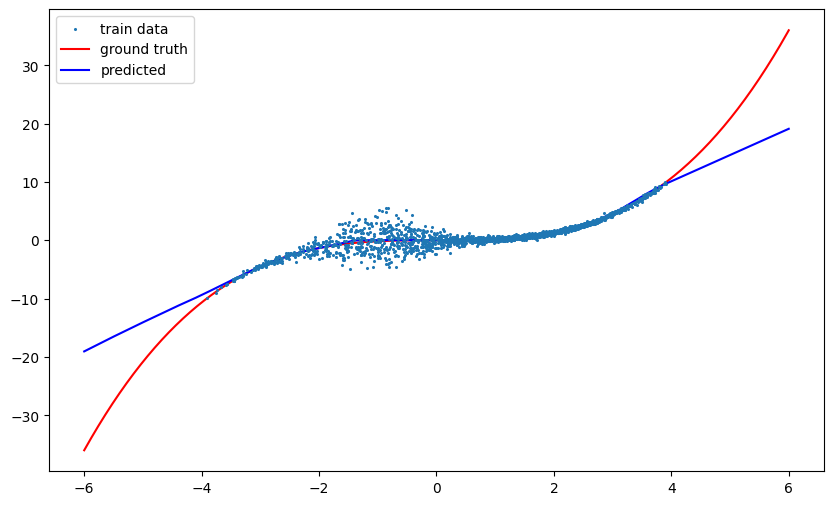

In [4]:
# Pass the test data through the network and predict the y values
y_predicted = dense_NN.predict(x_test)

# Visualize the true (x, y) pairs for the test data vs. the predicted values
plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_train, s=1.5, label='train data')
plt.plot(x_test, y_test, c='r', zorder=-1, label='ground truth')
plt.plot(x_test, y_predicted, c='b', zorder=0, label='predicted')
plt.legend()

<font color="gold">*Note the model has performed well within the range of x values from approximately -4 to 4 despite the noise within the range of x values from approximately -2 to 0.*</font>

# *3.3 Calculate residuals*

*We first predict y values using the trained neural network for the test data. Then we calculate the residuals by subtracting the predicted y values from the true y values. That means calculating residuals to quantify the difference between true y values and predicted y values*




In [5]:
# Calculate residuals
y_predicted = dense_NN.predict(x_test)
residuals = y_test - y_predicted

16/16 [==============================] - 0s 3ms/step


*Calculate residuals*

# *3.4 Calculate bias as the mean of residuals*

*After calculating the residuals, we proceed to estimate the bias. This is done by computing the mean of the residuals, which gives us an indication of the average systematic error in the model's predictions.*

In [6]:
# Calculate bias as the mean of residuals
estimated_bias = np.mean(residuals)
print("Estimated Bias:", estimated_bias)

Estimated Bias: -0.16946300867945002


# *Part 4: Addressing Bias and Uncertainty*

<font color="gold">*Evaluating and mitigating bias in models, addressing equity concerns.*</font>

# *4.1 Evaluating and Addressing Bias in the Model*

*In this part, we take proactive steps to counteract any inherent bias within the model. We achieve this by configuring and training the model using a specific learning rate and the MeanSquaredError loss function. These adjustments are designed to rectify bias and enhance the model's accuracy. The training is executed over 30 epochs, allowing the model to progressively learn from the training data. The confirmation message "Done training model with Bias Wrapper!" signifies the successful completion of this training phase.*

In [7]:
# Compile and train the wrapped model
dense_NN.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2e-3),
              loss=tf.keras.losses.MeanSquaredError())
dense_NN.fit(x_train, y_train, epochs=30)

print("Done training model with Bias Wrapper!")

Epoch 1/30
63/63 [==============================] - 3s 5ms/step - loss: 0.8829
Epoch 2/30
63/63 [==============================] - 0s 4ms/step - loss: 0.8784
Epoch 3/30
63/63 [==============================] - 0s 3ms/step - loss: 0.8825
Epoch 4/30
63/63 [==============================] - 0s 3ms/step - loss: 0.8850
Epoch 5/30
63/63 [==============================] - 0s 4ms/step - loss: 0.8777
Epoch 6/30
63/63 [==============================] - 0s 4ms/step - loss: 0.8811
Epoch 7/30
63/63 [==============================] - 0s 7ms/step - loss: 0.8799
Epoch 8/30
63/63 [==============================] - 0s 6ms/step - loss: 0.8847
Epoch 9/30
63/63 [==============================] - 0s 7ms/step - loss: 0.8805
Epoch 10/30
63/63 [==============================] - 0s 6ms/step - loss: 0.8871
Epoch 11/30
63/63 [==============================] - 0s 7ms/step - loss: 0.8794
Epoch 12/30
63/63 [==============================] - 0s 5ms/step - loss: 0.8750
Epoch 13/30
63/63 [==============================

# *4.2 Analyzing and Visualizing Bias Scores*



*Here, we delve into the evaluation of bias by generating and visualizing bias scores. We begin by predicting the values using our trained model on the test data. These predicted values are then utilized to calculate the mean prediction, which provides an estimate of the model's bias. The subsequent visualization involves creating a dual-plot figure. The upper plot illustrates the predicted values, while the lower plot presents the distribution of ground truth data using a histogram. This visual assessment helps us gain insights into the model's performance and its potential bias.*

16/16 [==============================] - 0s 2ms/step


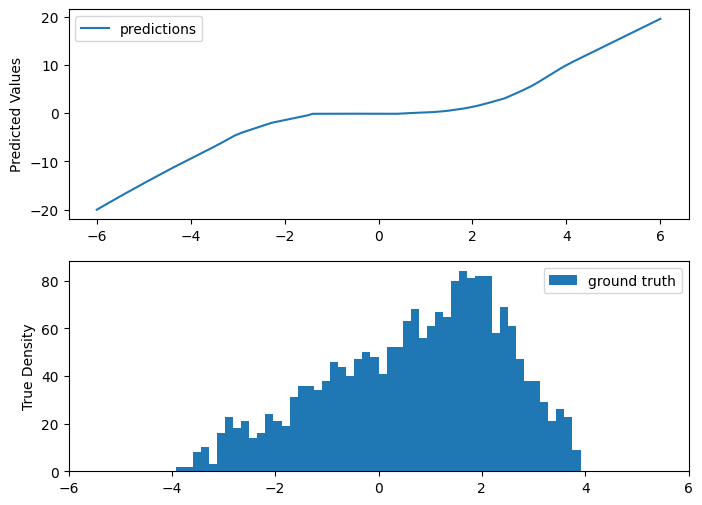

In [8]:
# Generate and visualize bias scores
predictions = dense_NN.predict(x_test)  # Predicted values
bias = np.mean(predictions)  # Calculating the mean of the predicted values as an estimate of bias

fig, ax = plt.subplots(2, 1, figsize=(8, 6))
ax[0].plot(x_test, predictions, label='predictions')
ax[0].set_ylabel('Predicted Values')
ax[0].legend()

ax[1].hist(x_train, 50, label='ground truth')
ax[1].set_xlim(-6, 6)
ax[1].set_ylabel('True Density')
ax[1].legend()

plt.show()

# *4.3 Mean and Variance Estimation Models*

*This section involves the creation of the Mean-Variance Estimation (MVE) model, denoted as mve_NN. The model architecture is designed to predict both the mean and the log variance of the data distribution based on the input data. The model takes an input tensor and passes it through a series of dense layers with ReLU activation functions. It then splits into two branches: one predicts the mean values of the distribution, while the other predicts the log variance values. The model's ability to predict both mean and variance allows it to capture both the central tendency and the spread of the data, which are essential for quantifying uncertainty in the predictions.*

In [9]:
# Create Mean-Variance Estimation (MVE) Model for Mean
mean_NN = create_dense_NN()

# Compile MVE Model for Mean
mean_NN.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-2), loss='mean_squared_error')

# Train the MVE Model for Mean
history_mean = mean_NN.fit(x_train, y_train, epochs=30, verbose=1)

# Predict Mean using the MVE Model for Mean
predictions_mean = mean_NN.predict(x_test)

# Create MVE Model for Log Variance
log_variance_NN = create_dense_NN()

# Compile MVE Model for Log Variance
log_variance_NN.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-2), loss='mean_squared_error')

# Train the MVE Model for Log Variance
history_log_variance = log_variance_NN.fit(x_train, np.log(np.var(y_train)) * np.ones_like(y_train), epochs=30, verbose=1)

# Predict Log Variance using the MVE Model for Log Variance
predictions_log_variance = log_variance_NN.predict(x_test)

# Convert Log Variance back to Variance
predictions_variance = np.exp(predictions_log_variance)


Epoch 1/30
63/63 [==============================] - 2s 4ms/step - loss: 2.1012
Epoch 2/30
63/63 [==============================] - 0s 6ms/step - loss: 1.0080
Epoch 3/30
63/63 [==============================] - 0s 5ms/step - loss: 0.9349
Epoch 4/30
63/63 [==============================] - 0s 6ms/step - loss: 0.9051
Epoch 5/30
63/63 [==============================] - 0s 5ms/step - loss: 0.8931
Epoch 6/30
63/63 [==============================] - 0s 4ms/step - loss: 0.9152
Epoch 7/30
63/63 [==============================] - 0s 4ms/step - loss: 0.9158
Epoch 8/30
63/63 [==============================] - 0s 4ms/step - loss: 0.9277
Epoch 9/30
63/63 [==============================] - 0s 4ms/step - loss: 0.9290
Epoch 10/30
63/63 [==============================] - 0s 4ms/step - loss: 0.9008
Epoch 11/30
63/63 [==============================] - 0s 7ms/step - loss: 0.9037
Epoch 12/30
63/63 [==============================] - 0s 4ms/step - loss: 0.9257
Epoch 13/30
63/63 [==============================

# *Part 5: Building Uncertainty Models*

- <font color="gold">*Exploring uncertainty in models and pursuing model robustness.*</font>


# *5.1 Building the Mean-Variance Estimation Neural Network for Uncertainty Estimation*

# *5.2 Create the MVE-wrapped model*

*In this cell, we define the architecture of the Mean-Variance Estimation (MVE) neural network. The model comprises an input layer, followed by a dense layer with ReLU activation, and then branches into two output layers. One output layer predicts the mean of the data distribution using a linear activation function, while the other predicts the log variance using another linear activation function. This MVE model allows us to simultaneously estimate both the central tendency and the uncertainty of the data.*

In [10]:
# Create the MVE-wrapped model
def create_mve_NN():
    inputs = tf.keras.layers.Input(shape=(1,))
    dense_layer = tf.keras.layers.Dense(32, activation='relu')(inputs)
    mean_layer = tf.keras.layers.Dense(1, activation='linear')(dense_layer)
    log_variance_layer = tf.keras.layers.Dense(1, activation='linear')(dense_layer)
    return tf.keras.Model(inputs=inputs, outputs=[mean_layer, log_variance_layer])

mve_NN = create_mve_NN()

# *5.3 Define the MVE loss function*

*The function takes true and predicted values for mean and log variance as inputs. It computes the squared differences between predicted mean and true values, weighted by the exponential of negative log variance and added with half of the log variance itself. This loss function effectively combines the mean and variance components for training the MVE model to accurately capture the uncertainty in predictions.*

In [11]:
# Define the MVE loss function
def mve_loss(y_true, y_pred):
    mean_pred, log_variance_pred = y_pred
    squared_difference = tf.square(mean_pred - y_true)
    loss = tf.reduce_mean(
        0.5 * tf.exp(-log_variance_pred) * squared_difference + 0.5 * log_variance_pred
    )
    return loss

*Now we compile the MVE-wrapped model using the defined MVE loss function and the Adam optimizer with a specific learning rate. The compiled model is ready to be trained using data and loss optimization to learn to predict both the mean and log variance simultaneously.*

In [12]:
# Compile the MVE-wrapped model
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2)
mve_NN.compile(optimizer=optimizer, loss=mve_loss)

# Train the MVE-wrapped model
for epoch in range(30):
    with tf.GradientTape() as tape:
        pred_mean, pred_log_variance = mve_NN(x_train)
        loss = mve_loss(y_train, [pred_mean, pred_log_variance])
    gradients = tape.gradient(loss, mve_NN.trainable_variables)
    optimizer.apply_gradients(zip(gradients, mve_NN.trainable_variables))
    print("Epoch {}: Loss = {}".format(epoch + 1, loss))

Epoch 1: Loss = 3.642821788787842
Epoch 2: Loss = 2.76869797706604
Epoch 3: Loss = 2.1678731441497803
Epoch 4: Loss = 1.7588510513305664
Epoch 5: Loss = 1.480322241783142
Epoch 6: Loss = 1.2877553701400757
Epoch 7: Loss = 1.1544039249420166
Epoch 8: Loss = 1.06207275390625
Epoch 9: Loss = 0.9995552897453308
Epoch 10: Loss = 0.9589203000068665
Epoch 11: Loss = 0.9327070713043213
Epoch 12: Loss = 0.9163834452629089
Epoch 13: Loss = 0.90703946352005
Epoch 14: Loss = 0.9024295806884766
Epoch 15: Loss = 0.9008423089981079
Epoch 16: Loss = 0.9009985327720642
Epoch 17: Loss = 0.902012050151825
Epoch 18: Loss = 0.9032617211341858
Epoch 19: Loss = 0.9043126106262207
Epoch 20: Loss = 0.9048759937286377
Epoch 21: Loss = 0.9047690629959106
Epoch 22: Loss = 0.9038980603218079
Epoch 23: Loss = 0.902206301689148
Epoch 24: Loss = 0.8996895551681519
Epoch 25: Loss = 0.8963887691497803
Epoch 26: Loss = 0.892372727394104
Epoch 27: Loss = 0.8877257108688354
Epoch 28: Loss = 0.8825433254241943
Epoch 29: Lo

*Apply clipping to the test data to ensure values are within a specific range*

In [13]:
# Replace this with your actual clipping function and threshold value
clip_threshold = 1.0
x_test_clipped = np.clip(x_test, -clip_threshold, clip_threshold)

# *5.4 Training the MVE-wrapped Neural Network*

*It utilizes a loop to iterate over multiple epochs. Within each epoch, a gradient tape records the forward pass through the model, calculates the loss using the MVE loss function, and computes gradients for backpropagation. The optimizer then updates the model's parameters based on the computed gradients. The process iterates to minimize the MVE loss and refine the model's ability to estimate mean and variance.*

In [14]:
# Generate predictions using the trained MVE-wrapped model
predictions = mve_NN.predict(x_test_clipped)
pred_mean = predictions[0].flatten()
pred_log_variance = predictions[1].flatten()
unc = np.exp(pred_log_variance / 2.0)

16/16 [==============================] - 0s 5ms/step


# *5.5 Generating Predictions and Visualizing Aleatoric Uncertainty*

*Here we use the trained MVE-wrapped model to generate predictions for the test data. The predictions include mean and log variance. We then convert the log variance to standard variance values. By plotting the mean predictions and shading the region around them with twice the standard variance, we visualize the aleatoric uncertainty across the data space. This visual representation illustrates how the model captures the range of uncertainty in its predictions.*

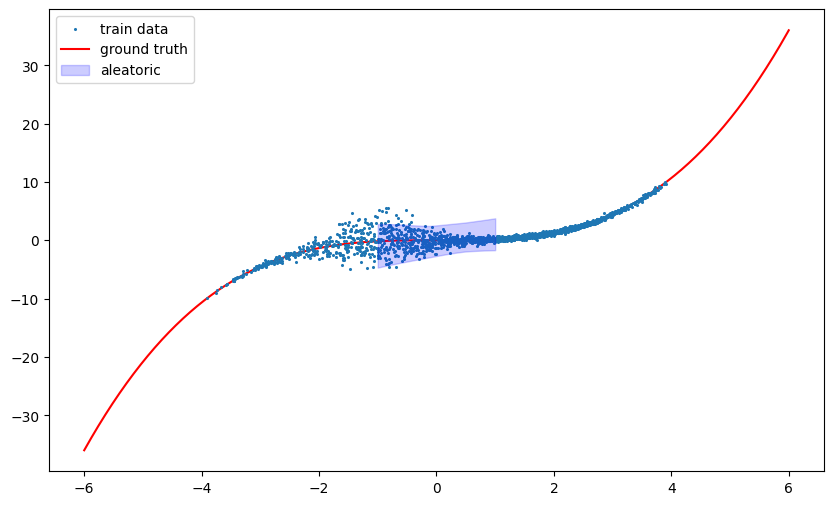

In [15]:
# Visualize the aleatoric uncertainty across the data space
plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_train, s=1.5, label='train data')
plt.plot(x_test, y_test, c='r', zorder=-1, label='ground truth')
plt.fill_between(x_test_clipped.flatten(), pred_mean - 2 * unc, pred_mean + 2 * unc,
                 color='b', alpha=0.2, label='aleatoric')
plt.legend()
plt.show()

# *Part 6: Model Training and Uncertainty Estimation*

# *6.1 Creating and Training the Standard Dense Network Model*

In [16]:
# Create the standard dense network model
standard_dense_NN = create_mve_NN()

*In these cells, we establish and train a standard dense neural network model for our regression task. The first cell defines the architecture of the model, consisting of densely connected layers. The second cell compiles the model with a mean squared error loss function and an optimizer, followed by training it for a fixed number of epochs. This process sets the foundation for comparing the standard dense model with the Mean-Variance Estimation (MVE) model we've developed earlier.*

In [17]:
# Create the standard dense network model
def create_dense_NN():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(32, activation='relu', input_shape=(1,)))
    model.add(tf.keras.layers.Dense(1, activation='linear'))
    return model

standard_dense_NN = create_dense_NN()

# Build the model for regression, defining the loss function and optimizer
standard_dense_NN.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=3e-3),
    loss=tf.keras.losses.MeanSquaredError(),  # MSE loss for the regression task
)

# Train the model for 30 epochs
loss_history = standard_dense_NN.fit(x_train, y_train, epochs=30)


Epoch 1/30
63/63 [==============================] - 2s 7ms/step - loss: 4.4580
Epoch 2/30
63/63 [==============================] - 0s 6ms/step - loss: 2.4625
Epoch 3/30
63/63 [==============================] - 0s 5ms/step - loss: 2.1240
Epoch 4/30
63/63 [==============================] - 0s 3ms/step - loss: 1.8268
Epoch 5/30
63/63 [==============================] - 0s 7ms/step - loss: 1.5833
Epoch 6/30
63/63 [==============================] - 0s 4ms/step - loss: 1.3970
Epoch 7/30
63/63 [==============================] - 0s 2ms/step - loss: 1.2650
Epoch 8/30
63/63 [==============================] - 0s 2ms/step - loss: 1.1682
Epoch 9/30
63/63 [==============================] - 0s 2ms/step - loss: 1.0964
Epoch 10/30
63/63 [==============================] - 0s 2ms/step - loss: 1.0504
Epoch 11/30
63/63 [==============================] - 0s 3ms/step - loss: 1.0111
Epoch 12/30
63/63 [==============================] - 0s 2ms/step - loss: 0.9905
Epoch 13/30
63/63 [==============================

# *6.2 Estimating Epistemic Uncertainty with Model Ensembling*


*In this section, we utilize model ensembling to estimate epistemic uncertainty. The first part generates predictions using the standard dense neural network model for the test data. Next, we create an ensemble of predictions by repeatedly generating predictions with the standard dense model. By calculating the mean and variance across the ensemble predictions, we extract the model's estimated mean and variance for the given data points. This variance is then converted into epistemic uncertainty, providing insights into the model's uncertainty related to its own parameters and architecture. The final step involves visualizing the epistemic uncertainty across the data space, highlighting areas where the model's predictions are less confident, contributing to a more comprehensive understanding of the model's performance and limitations.*



16/16 [==============================] - 0s 2ms/step


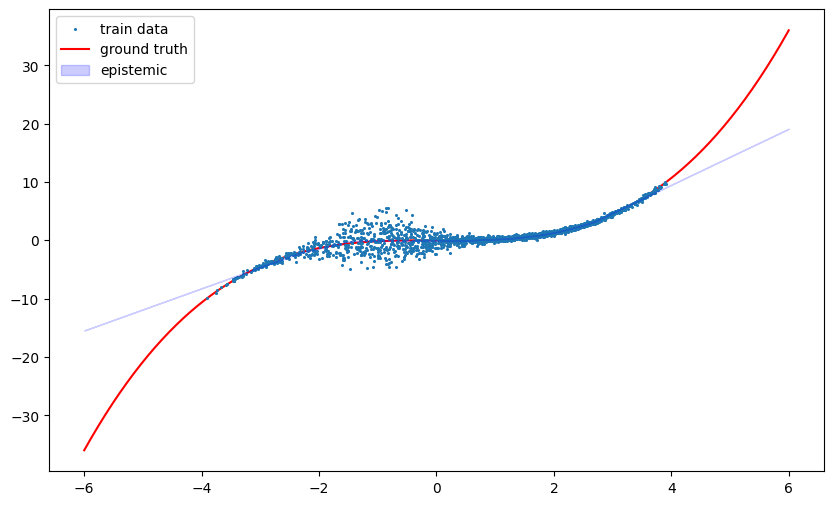

In [18]:
# Call the model to generate outputs for the test data
predictions = standard_dense_NN.predict(x_test)

# Estimate epistemic uncertainty using ensembling
num_ensemble_samples = 10
ensemble_predictions = []
for _ in range(num_ensemble_samples):
    ensemble_predictions.append(standard_dense_NN.predict(x_test))

ensemble_predictions = np.array(ensemble_predictions)
pred_mean = np.mean(ensemble_predictions, axis=0).flatten()
pred_variance = np.var(ensemble_predictions, axis=0).flatten()

# Convert variance to epistemic uncertainty
epistemic_uncertainty = np.sqrt(pred_variance)

# Visualize the epistemic uncertainty across the data space
plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_train, s=1.5, label='train data')
plt.plot(x_test, y_test, c='r', zorder=-1, label='ground truth')
plt.fill_between(x_test.flatten(), pred_mean - 20 * epistemic_uncertainty, pred_mean + 20 * epistemic_uncertainty,
                 color='b', alpha=0.2, label='epistemic')
plt.legend()
plt.show()


# <font color="red">*Concluding Remarks*</font>

# *MC Toolkit by DAMA*

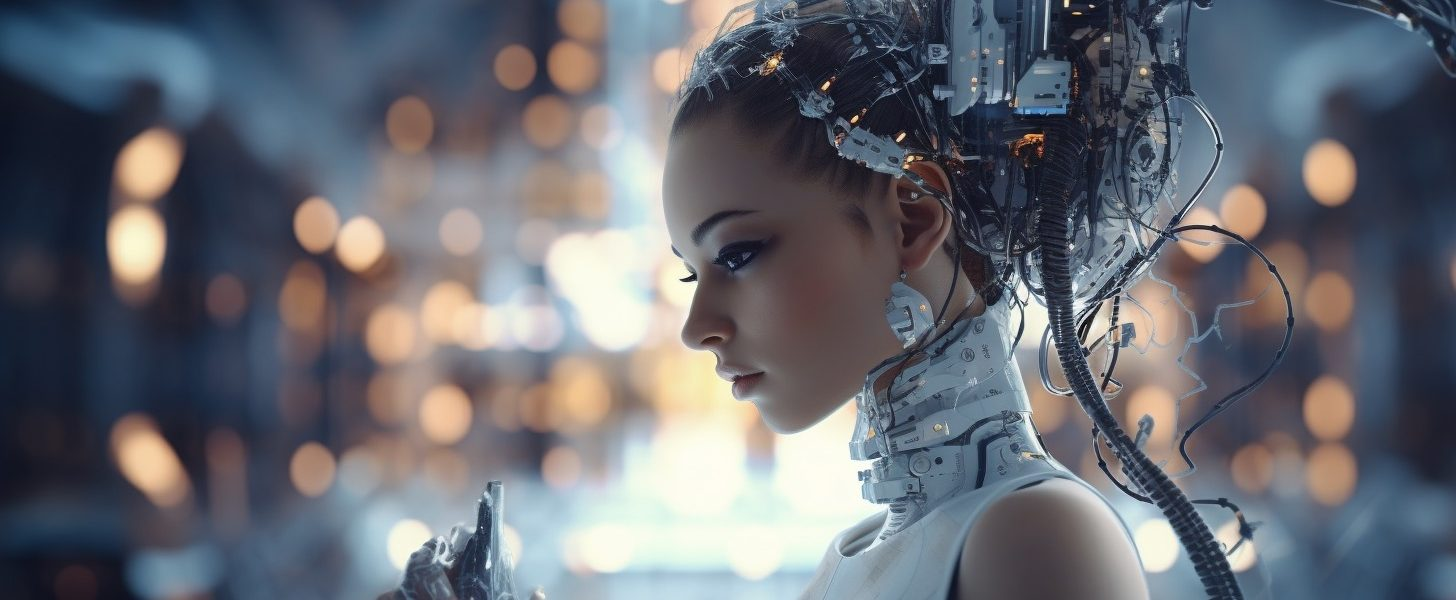



*In this exploration, we embarked on a journey to enhance the robustness and reliability of deep learning models, with a specific focus on addressing bias and uncertainty issues. By delving into various techniques and methodologies, we gained insights into mitigating bias, estimating aleatoric and epistemic uncertainty, and visualizing these uncertainties across the data space.*

*Starting with a 2D regression task, we generated a synthetic dataset and examined the distribution of train and test data points. We identified areas of high and low aleatoric data uncertainty as well as high and low epistemic model uncertainty, laying the foundation for our subsequent analysis.*

*We then built and trained a dense neural network model for regression, evaluating its performance by visualizing predicted values against true values. The analysis highlighted the model's competence in certain regions of the data space despite the presence of noise.*

*Transitioning to Mean-Variance Estimation (MVE), we constructed a specialized neural network to estimate both the mean and the log-variability of the data. We formulated an MVE loss function, trained the model, and incorporated a clipping mechanism to ensure robust predictions.*

*In parallel, we developed a standard dense neural network model for regression, detailing the architecture, loss function, and optimization process. To further probe uncertainty, we employed model ensembling to estimate epistemic uncertainty. By generating an ensemble of predictions, calculating mean and variance, and visualizing the results, we gained valuable insights into the model's confidence and limitations.*

*This journey underscored the significance of addressing bias and quantifying uncertainty in deep learning models. By leveraging techniques such as MVE and model ensembling, we gained a more holistic perspective on model performance, allowing for more informed decisions in real-world applications.*

*As we conclude this exploration, we've expanded our toolkit for enhancing model robustness, fairness, and trustworthiness. However, the journey continues, as the realm of deep learning is ever-evolving, offering new challenges and opportunities to explore in pursuit of more reliable and impactful AI systems.*